<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd

# Loading fact_bookings table.

In [2]:
df_booking = pd.read_csv('fact_bookings.csv')
df_booking.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


## (1.) Exploring the data.

In [3]:
df_booking.shape

(134590, 12)

In [4]:
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
df_booking.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

##### Columns in dataset - 

booking_id, 

property_id, 

booking_date, 

check_in_date,

checkout_date, 

no_guests, 

room_category, 

booking_platform,

ratings_given, 

booking_status, 

revenue_generated,

revenue_realized

##### RT1, RT2, RT3, RT4 are the total categories of rooms.

In [6]:
df_booking['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

##### These are all booking platforms direct online, others, logtrip, tripster, makeyourtrip,journey, direct offline.

<Axes: ylabel='booking_platform'>

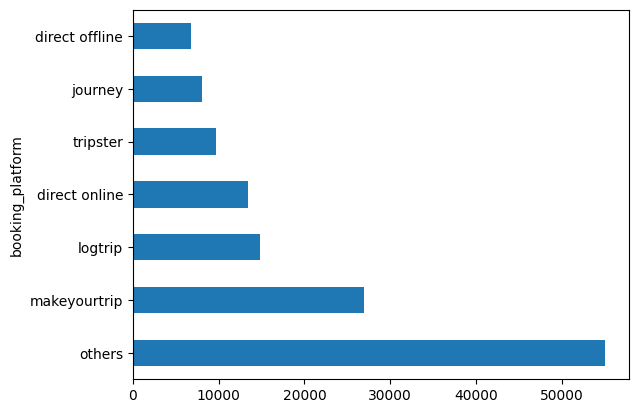

In [7]:
df_booking.booking_platform.value_counts().plot(kind ="barh")

In [8]:
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### Loading remaining datasets.

In [36]:
df_date = pd.read_csv('dim_date.csv')
df_hotel = pd.read_csv('dim_hotels.csv')
df_room = pd.read_csv('dim_rooms.csv')
df_agg_booking = pd.read_csv('fact_aggregated_bookings.csv')

### Exploring these datasets

## Exploring dim_hotels dataset.

<Axes: ylabel='category'>

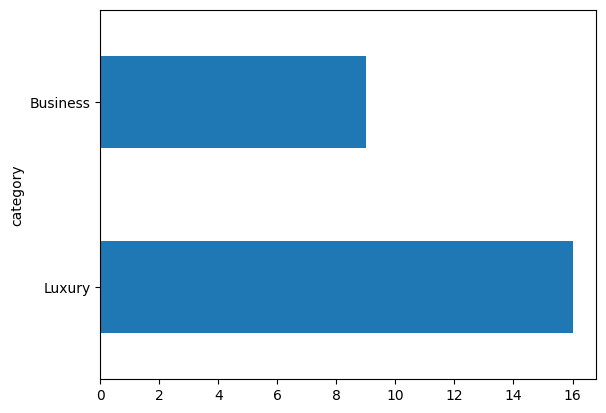

In [10]:
df_hotel.category.value_counts().plot(kind= 'barh')

<Axes: ylabel='city'>

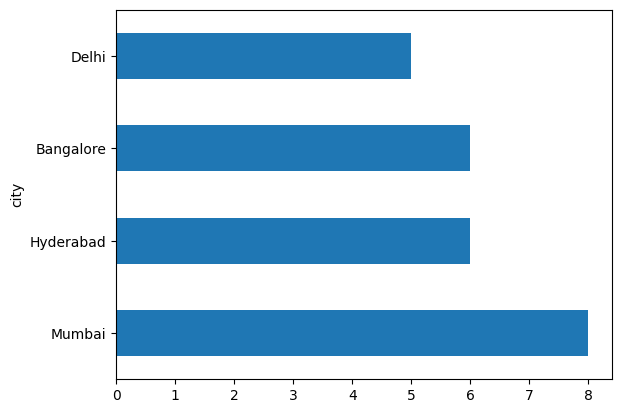

In [11]:
df_hotel.city.value_counts().plot(kind = 'barh')

<Axes: ylabel='category,city'>

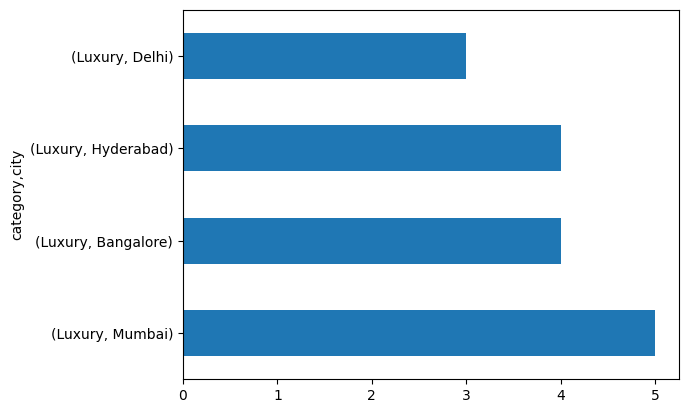

In [12]:
df_hotel.loc[df_hotel['category'] == 'Luxury', ['category','city']].value_counts().plot(kind = 'barh')

<Axes: ylabel='category,city'>

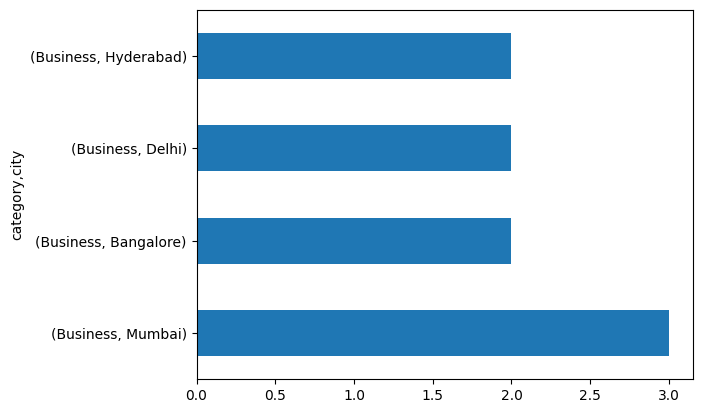

In [13]:
df_hotel.loc[df_hotel['category'] == 'Business', ['category','city']].value_counts().plot(kind = 'barh')

## Exploring aggregate booking table

In [11]:
df_agg_booking.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


## Total bookings per id.

In [14]:
df_agg_booking.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

### Days on which bookings are greater than capacity

In [15]:
df_agg_booking[df_agg_booking.successful_bookings > df_agg_booking.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


## Properties that have highest capacity

In [16]:
df_agg_booking[df_agg_booking.capacity==df_agg_booking.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# (2.) Data Cleaning 

## Guests cannot be 0 or less than 0.

In [17]:
df_booking = df_booking[df_booking.no_guests>0]

In [18]:
df_booking.shape

(134578, 12)

#### Outlier removal in revenue generated

In [19]:
df_booking.revenue_generated.min(), df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

In [20]:
avg, std = df_booking.revenue_generated.mean(), df_booking.revenue_generated.std()

In [21]:
higher_limit = avg + 3*std
lower_limit = avg - 3*std


In [22]:
higher_limit

np.float64(294498.50173207896)

In [23]:
lower_limit

np.float64(-263742.4278567056)

In [24]:
df_booking = df_booking[df_booking['revenue_generated'] <= higher_limit]

#### Outlier removal in revenue realized

In [25]:
df_booking.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [26]:
high = df_booking.revenue_realized.mean() + 3*df_booking.revenue_realized.std()

### digging further

In [27]:
df_booking[df_booking.revenue_realized > high].room_category.unique()

array(['RT4'], dtype=object)

#### All the outliers fall under the category of RT4 room type which is luxury category

In [28]:
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


#### Digging further in RT4 category rooms

In [29]:
df_booking[df_booking.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [30]:
23439.308444 + (3*9048.599076)

50585.105672000005

### No outliers in revenue realized column

In [31]:
df_booking.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc  

### In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

In [32]:
df_agg_booking.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [33]:
df_agg_booking[df_agg_booking.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [34]:
df_agg_booking.capacity.median()

np.float64(25.0)

In [40]:
df_agg_booking.capacity.fillna(df_agg_booking.capacity.median(), inplace = True)

C:\Users\jaint\AppData\Local\Temp\ipykernel_10780\568931997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_booking.capacity.fillna(df_agg_booking.capacity.median(), inplace = True)


### In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records

In [43]:
df_agg_booking[df_agg_booking.successful_bookings > df_agg_booking.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


Clearly outliers as successful bookings cannot be greater than capacity.

So we will filter them out

In [46]:
df_agg_booking = df_agg_booking[df_agg_booking.successful_bookings<=df_agg_booking.capacity]

# (3.) Data Transformation

#### Creating occupancy percentage column

In [47]:
df_agg_booking['occ_pct'] = df_agg_booking.apply(lambda x: x['successful_bookings']/x['capacity'], axis = 1)

C:\Users\jaint\AppData\Local\Temp\ipykernel_10780\1653255674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_booking['occ_pct'] = df_agg_booking.apply(lambda x: x['successful_bookings']/x['capacity'], axis = 1)


In [48]:
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


Converting to a percent value.

In [49]:
df_agg_booking['occ_pct'] = df_agg_booking['occ_pct'].apply(lambda x: round(x*100,2))

C:\Users\jaint\AppData\Local\Temp\ipykernel_10780\2469282488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_booking['occ_pct'] = df_agg_booking['occ_pct'].apply(lambda x: round(x*100,2))


In [50]:
df_agg_booking

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


# (4.) Insights Generation

#### Avg occupancy rate for each category 

In [54]:
df_agg_booking.groupby("room_category")['occ_pct'].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [56]:
df_agg_booking.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [57]:
df_room.head(5)

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [61]:
df = pd.merge(df_agg_booking, df_room, left_on = "room_category", right_on = "room_id")

df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [63]:
df.groupby("room_class")['occ_pct'].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

Dropping the extra column.

In [64]:
df.drop("room_id", axis= 1, inplace= True)

Axis = 1 mean column wise operation

#### average occupancy rate per city

In [66]:
df = pd.merge(df, df_hotel, on= 'property_id')

In [67]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

#### When was the occupancy better? Weekday or Weekend?

In [68]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")

In [69]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

####  In the month of June, what is the occupancy for different cities

In [72]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [74]:
df_june_22 = df[df["mmm yy"] == 'Jun 22']

In [82]:
df_june_22.groupby('city').occ_pct.mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

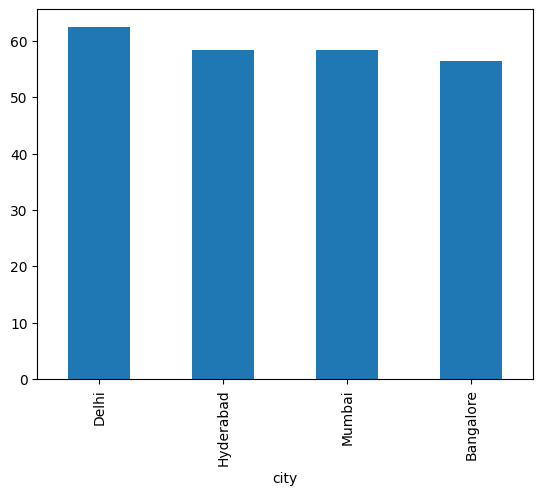

In [84]:
df_june_22.groupby('city').occ_pct.mean().round(2).sort_values(ascending=False).plot(kind= 'bar')

#### We got new data for the month of august. Append that to existing data

In [86]:
df_august = pd.read_csv('new_data_august.csv')

In [87]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [88]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [90]:
df_august.shape

(7, 13)

In [91]:
df.shape

(6497, 14)

In [92]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis =0)

#### Revenue realized per city

In [93]:
latest_df.shape

(6504, 15)

In [117]:
df_booking_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

#### revenue realized per hotel type

In [ ]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

#### average rating per city

In [ ]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

#### pie chart of revenue realized per booking platform

In [ ]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")